# Prediksi Fetal Health Menggunakan Metode ANN

In [1]:
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Membaca data dari file CSV
df = pd.read_csv ('fetal_health.csv')
df.head(5) # Menampilkan 5 baris pertama data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
column_names = df.columns
# Menampilkan nama-nama kolom
for column in column_names:
    print(column)

baseline value
accelerations
fetal_movement
uterine_contractions
light_decelerations
severe_decelerations
prolongued_decelerations
abnormal_short_term_variability
mean_value_of_short_term_variability
percentage_of_time_with_abnormal_long_term_variability
mean_value_of_long_term_variability
histogram_width
histogram_min
histogram_max
histogram_number_of_peaks
histogram_number_of_zeroes
histogram_mode
histogram_mean
histogram_median
histogram_variance
histogram_tendency
fetal_health


In [4]:
# Memilih atribut yang akan digunakan untuk prediksi
data = df[['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'fetal_health']]
data.head() # Menampilkan 5 baris pertama data yang telah dipilih

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,1.0


In [5]:
# menghitung jumlah nilai null dalam seluruh kolom
data.isna().sum()

baseline value                     0
accelerations                      0
fetal_movement                     0
uterine_contractions               0
light_decelerations                0
severe_decelerations               0
prolongued_decelerations           0
abnormal_short_term_variability    0
fetal_health                       0
dtype: int64

In [6]:
# Pisahkan fitur (X) dan target (y)
X = data[['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability']]
y = data['fetal_health']

In [7]:
# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
# Normalisasi data (menghitung rata-rata dan deviasi standar, kemudian mengurangkan rata-rata dan membagi dengan deviasi standar)
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [9]:
# Bangun model jaringan saraf tiruan
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer
    keras.layers.Dense(64, activation='relu'),  # Hidden layer dengan 64 neuron
    keras.layers.Dense(32, activation='relu'),  # Hidden layer dengan 32 neuron
    keras.layers.Dense(4, activation='softmax')  # Output layer dengan 4 neuron (sesuai dengan jumlah kategori "fetal_health")
])

In [10]:
# Kompilasi model dengan optimizer "adam" dan loss function "sparse_categorical_crossentropy" untuk klasifikasi multi-kategori
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Latih model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6081 - loss: 1.1567 - val_accuracy: 0.7793 - val_loss: 0.5883
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8337 - loss: 0.4929 - val_accuracy: 0.8662 - val_loss: 0.3892
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8688 - loss: 0.3637 - val_accuracy: 0.8732 - val_loss: 0.3532
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8613 - loss: 0.3272 - val_accuracy: 0.8709 - val_loss: 0.3433
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8691 - loss: 0.3064 - val_accuracy: 0.8850 - val_loss: 0.3262
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8728 - loss: 0.2939 - val_accuracy: 0.8873 - val_loss: 0.3166
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8630 - loss: 0.2961 - val_accuracy: 0.8803 - val_loss: 0.3169
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8957 - loss: 0.2613 - val_accuracy: 0.8826 - val_loss:

In [12]:
# Evaluasi model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Accuracy on test data: {test_acc}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9064 - loss: 0.2727 
Accuracy on test data: 0.9014084339141846


In [13]:
# Prediksi
predictions = model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


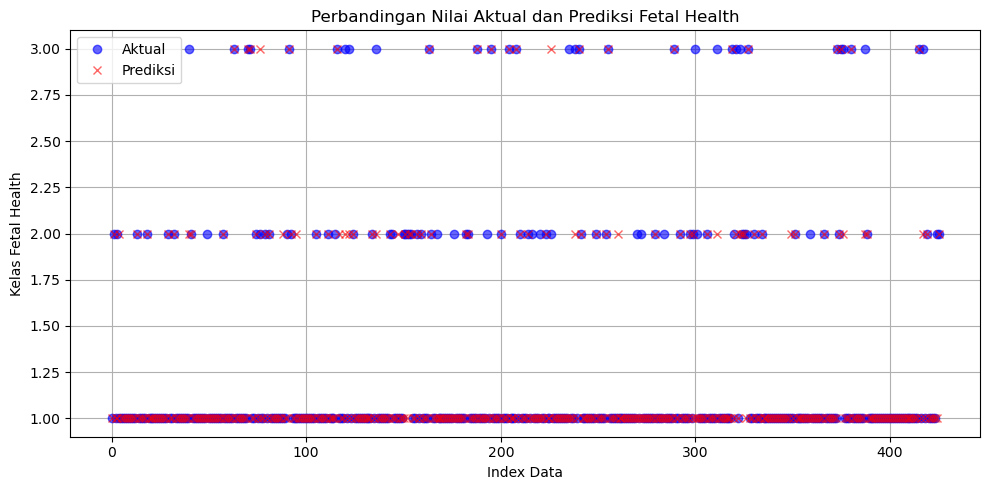

In [14]:
# Ambil label aktual dan label hasil prediksi
y_actual = y_test.to_numpy()
y_predicted = np.argmax(predictions, axis=1) 

# Buat grafik
plt.figure(figsize=(10, 5))
plt.plot(y_actual, 'bo', label='Aktual', alpha=0.6)       
plt.plot(y_predicted, 'rx', label='Prediksi', alpha=0.6)  

# Tambahkan label dan judul
plt.title('Perbandingan Nilai Aktual dan Prediksi Fetal Health')
plt.xlabel('Index Data')
plt.ylabel('Kelas Fetal Health')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# Konversi ke array
y_actual = y_test.to_numpy()
y_predicted = np.argmax(predictions, axis=1)

# Buat array boolean untuk cek prediksi benar atau salah
hasil_prediksi = (y_predicted == y_actual)

# Hitung jumlah prediksi benar dan salah
hasil_df = pd.Series(hasil_prediksi).map({True: 'Benar', False: 'Salah'})
print("Jumlah Prediksi Benar vs Salah:")
print(hasil_df.value_counts())

Jumlah Prediksi Benar vs Salah:
Benar    384
Salah     42
dtype: int64


In [16]:
# Input pengguna
input_data = pd.DataFrame({
    'baseline value': [float(input("Baseline value: "))],
    'accelerations': [float(input("Accelerations: "))],
    'fetal_movement': [float(input("Fetal Movement: "))],
    'uterine_contractions': [float(input("Uterine Contractions: "))],
    'light_decelerations': [float(input("Light Decelerations: "))],
    'severe_decelerations': [float(input("Severe Decelerations: "))],
    'prolongued_decelerations': [float(input("Prolongued Decelerations: "))],
    'abnormal_short_term_variability': [float(input("Abnormal Short-term Variability: "))]
})

# Normalisasi data input
input_data = (input_data - mean) / std

# Prediksi
predicted_class = model.predict(input_data)
predicted_class = np.argmax(predicted_class, axis=-1)

# Hasil prediksi
if predicted_class[0] == 1:
    result = "Suspect"
elif predicted_class[0] == 2:
    result = "Pathological"
else:
    result = "Normal"

print("Hasil Prediksi Fetal Health: ", result)

Baseline value: 3.5
Accelerations: 4
Fetal Movement: 3.4
Uterine Contractions: 4
Light Decelerations: 3
Severe Decelerations: 2
Prolongued Decelerations: 5.6
Abnormal Short-term Variability: 5.6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Hasil Prediksi Fetal Health:  Normal
